<a href="https://colab.research.google.com/github/hardiksharma6555/MLP_code/blob/main/mlpp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Importing Necessay Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

###Loading the Dataset

In [5]:
from google.colab import files
files.upload()

Saving train_data.csv to train_data.csv


{'train_data.csv': b'offer expiration,income_range,no_visited_Cold drinks,travelled_more_than_15mins_for_offer,Restaur_spend_less_than20,Marital Status,restaurant type,age,Prefer western over chinese,travelled_more_than_25mins_for_offer,travelled_more_than_5mins_for_offer,no_visited_bars,gender,car,restuarant_same_direction_house,Cooks regularly,Customer type,Qualification,is foodie,no_Take-aways,Job/Job Industry,restuarant_opposite_direction_house,has Children,visit restaurant with rating (avg),temperature,Restaur_spend_greater_than20,Travel Time,Climate,drop location,Prefer home food,Offer Accepted\r\n2days,\xe2\x82\xb9100000 or More,4~8,1,less1,Married partner,4 star restaurant,36,0,0,1,less1,Female,,0,1,Individual,Bachelors degree,0,1~3,Unemployed,0,0,4,67,less1,22,Spring,Location B,0,No\r\n2days,\xe2\x82\xb987500 - \xe2\x82\xb999999,4~8,0,4~8,Married partner,Take-away restaurant,50plus,0,0,1,never,Female,,1,1,Individual,Bachelors degree,0,1~3,Unemployed,0,1,3,89,1~3,18,Summer,Loca

In [9]:
from google.colab import files
files.upload()

Saving test_data.csv to test_data.csv


{'test_data.csv': b'offer expiration,income_range,no_visited_Cold drinks,travelled_more_than_15mins_for_offer,Restaur_spend_less_than20,Marital Status,restaurant type,age,Prefer western over chinese,travelled_more_than_25mins_for_offer,travelled_more_than_5mins_for_offer,no_visited_bars,gender,car,restuarant_same_direction_house,Cooks regularly,Customer type,Qualification,is foodie,no_Take-aways,Job/Job Industry,restuarant_opposite_direction_house,has Children,visit restaurant with rating (avg),temperature,Restaur_spend_greater_than20,Travel Time,Climate,drop location,Prefer home food\r\n2days,\xe2\x82\xb937500 - \xe2\x82\xb949999,1~3,1,1~3,Divorced,Take-away restaurant,50plus,0,1,1,less1,Male,,0,0,Individual,Graduate degree (Masters or Doctorate),0,4~8,Sales & Related,1,1,4,89,less1,7,Summer,Location C,0\r\n10hours,\xe2\x82\xb925000 - \xe2\x82\xb937499,4~8,0,1~3,Unmarried partner,Cold drinks,21,1,0,1,gt8,Male,,0,0,Individual,Some college - no degree,1,gt8,Computer & Mathematical,1,1,0

In [10]:
train = pd.read_csv('train_data.csv')
test = pd.read_csv('test_data.csv')

In [11]:
print("Shape of train: ", train.shape)
print("Shape of test ", test.shape)

Shape of train:  (12379, 31)
Shape of test  (5305, 30)


In [12]:
train.head()

offer expiration     income_range no_visited_Cold drinks  \
0            2days  ₹100000 or More                    4~8   
1            2days  ₹87500 - ₹99999                    4~8   
2            2days  ₹87500 - ₹99999                  less1   
3          10hours  ₹37500 - ₹49999                  less1   
4            2days  ₹100000 or More                  never   

   travelled_more_than_15mins_for_offer Restaur_spend_less_than20  \
0                                     1                     less1   
1                                     0                       4~8   
2                                     1                       1~3   
3                                     0                       1~3   
4                                     1                       1~3   

    Marital Status       restaurant type     age  Prefer western over chinese  \
0  Married partner     4 star restaurant      36                            0   
1  Married partner  Take-away restaurant  50plus                            0   
2           Single           Cold drinks      26                            1   
3           Single  Take-away restaurant      46                            1   
4           Single     4 star restaurant      21                            0   

   travelled_more_than_25mins_for_offer  ...  \
0                                     0  ...   
1                                     0  ...   
2                                     0  ...   
3                                     0  ...   
4                                     1  ...   

   restuarant_opposite_direction_house has Children  \
0                                    0            0   
1                                    0            1   
2                                    1            1   
3                                    0            1   
4                                    1            0   

  visit restaurant with rating (avg) temperature  \
0                                  4          67   
1                                  3          89   
2                                  4          67   
3                                  3          89   
4                                  3          40   

   Restaur_spend_greater_than20  Travel Time Climate drop location  \
0                         less1           22  Spring    Location B   
1                           1~3           18  Summer    Location B   
2                         less1            7  Winter    Location A   
3                           1~3            7  Summer    Location C   
4                         less1            7  Summer    Location C   

   Prefer home food Offer Accepted  
0                 0             No  
1                 0            Yes  
2                 1            Yes  
3                 0             No  
4                 0             No  

[5 rows x 31 columns]

In [13]:
 test.head()

offer expiration     income_range no_visited_Cold drinks  \
0            2days  ₹37500 - ₹49999                    1~3   
1          10hours  ₹25000 - ₹37499                    4~8   
2            2days  ₹100000 or More                  never   
3            2days  ₹25000 - ₹37499                  never   
4          10hours  ₹12500 - ₹24999                  never   

   travelled_more_than_15mins_for_offer Restaur_spend_less_than20  \
0                                     1                       1~3   
1                                     0                       1~3   
2                                     1                     never   
3                                     1                       1~3   
4                                     0                       1~3   

      Marital Status       restaurant type     age  \
0           Divorced  Take-away restaurant  50plus   
1  Unmarried partner           Cold drinks      21   
2             Single           Cold drinks      21   
3    Married partner   Restaurant with pub      41   
4             Single     2 star restaurant      31   

   Prefer western over chinese  travelled_more_than_25mins_for_offer  ...  \
0                            0                                     1  ...   
1                            1                                     0  ...   
2                            1                                     0  ...   
3                            0                                     0  ...   
4                            1                                     0  ...   

          Job/Job Industry restuarant_opposite_direction_house has Children  \
0          Sales & Related                                   1            1   
1  Computer & Mathematical                                   1            1   
2               Unemployed                                   1            0   
3               Unemployed                                   1            1   
4               Unemployed                                   0            0   

  visit restaurant with rating (avg)  temperature  \
0                                  4           89   
1                                  0           67   
2                                  4           67   
3                                  0           40   
4                                  0           89   

   Restaur_spend_greater_than20 Travel Time Climate  drop location  \
0                         less1           7  Summer     Location C   
1                         less1          18  Summer     Location A   
2                         never           7  Summer     Location C   
3                         less1          18  Spring     Location C   
4                           1~3          18  Summer     Location B   

  Prefer home food  
0                0  
1                1  
2                0  
3                1  
4                1  

[5 rows x 30 columns]

In [14]:
df = pd.concat((train,test))
temp_df = df
print("Shape of df:", df.shape)

Shape of df: (17684, 31)


###Exploratory Data Analysis



In [15]:
pd.set_option("display.max_columns", 18000)
pd.set_option("display.max_columns", 35)

In [16]:
df.head(6)

offer expiration      income_range no_visited_Cold drinks  \
0            2days   ₹100000 or More                    4~8   
1            2days   ₹87500 - ₹99999                    4~8   
2            2days   ₹87500 - ₹99999                  less1   
3          10hours   ₹37500 - ₹49999                  less1   
4            2days   ₹100000 or More                  never   
5          10hours  Less than ₹12500                    4~8   

   travelled_more_than_15mins_for_offer Restaur_spend_less_than20  \
0                                     1                     less1   
1                                     0                       4~8   
2                                     1                       1~3   
3                                     0                       1~3   
4                                     1                       1~3   
5                                     1                       gt8   

    Marital Status       restaurant type     age  Prefer western over chinese  \
0  Married partner     4 star restaurant      36                            0   
1  Married partner  Take-away restaurant  50plus                            0   
2           Single           Cold drinks      26                            1   
3           Single  Take-away restaurant      46                            1   
4           Single     4 star restaurant      21                            0   
5         Divorced  Take-away restaurant  50plus                            1   

   travelled_more_than_25mins_for_offer  travelled_more_than_5mins_for_offer  \
0                                     0                                    1   
1                                     0                                    1   
2                                     0                                    1   
3                                     0                                    1   
4                                     1                                    1   
5                                     0                                    1   

  no_visited_bars  gender     car  restuarant_same_direction_house  \
0           less1  Female     NaN                                0   
1           never  Female     NaN                                1   
2           never  Female  Mazda5                                1   
3           never    Male     NaN                                1   
4           less1  Female     NaN                                0   
5           never  Female     NaN                                0   

   Cooks regularly Customer type             Qualification  is foodie  \
0                1    Individual          Bachelors degree          0   
1                1    Individual          Bachelors degree          0   
2                0    Individual          Bachelors degree          1   
3                0    Individual  Some college - no degree          1   
4                0    Individual  Some college - no degree          1   
5                0    Individual          Bachelors degree          1   

  no_Take-aways                          Job/Job Industry  \
0           1~3                                Unemployed   
1           1~3                                Unemployed   
2           1~3  Arts Design Entertainment Sports & Media   
3           1~3                           Sales & Related   
4           gt8                           Sales & Related   
5           gt8                           Sales & Related   

   restuarant_opposite_direction_house  has Children  \
0                                    0             0   
1                                    0             1   
2                                    1             1   
3                                    0             1   
4                                    1             0   
5                                    1             0   

   visit restaurant with rating (avg)  temperature  \
0                                   4           67   
1              

In [17]:
df.tail(6)

offer expiration     income_range no_visited_Cold drinks  \
5299          10hours  ₹75000 - ₹87499                  never   
5300            2days  ₹25000 - ₹37499                  less1   
5301          10hours  ₹62500 - ₹74999                    1~3   
5302          10hours  ₹50000 - ₹62499                    gt8   
5303            2days  ₹50000 - ₹62499                    1~3   
5304            2days  ₹37500 - ₹49999                  less1   

      travelled_more_than_15mins_for_offer Restaur_spend_less_than20  \
5299                                     0                       4~8   
5300                                     0                     less1   
5301                                     0                       4~8   
5302                                     1                       4~8   
5303                                     1                       1~3   
5304                                     0                       1~3   

         Marital Status      restaurant type     age  \
5299  Unmarried partner    4 star restaurant      36   
5300  Unmarried partner    4 star restaurant      26   
5301    Married partner    2 star restaurant      26   
5302    Married partner          Cold drinks      36   
5303    Married partner  Restaurant with pub      36   
5304    Married partner    4 star restaurant  50plus   

      Prefer western over chinese  travelled_more_than_25mins_for_offer  \
5299                            0                                     0   
5300                            0                                     0   
5301                            0                                     0   
5302                            0                                     0   
5303                            1                                     0   
5304                            1                                     0   

      travelled_more_than_5mins_for_offer no_visited_bars  gender  car  \
5299                                    1           never    Male  NaN   
5300                                    1           less1    Male  NaN   
5301                                    1             4~8  Female  NaN   
5302                                    1             4~8  Female  NaN   
5303                                    1             NaN  Female  NaN   
5304                                    1             1~3    Male  NaN   

      restuarant_same_direction_house  Cooks regularly Customer type  \
5299                                0                1   With Family   
5300                                1                0    Individual   
5301                                1                1    Individual   
5302                                0                1    Individual   
5303                                0                1    Individual   
5304                                0                1    Individual   

                               Qualification  is foodie no_Take-aways  \
5299                Some college - no degree          0           4~8   
5300                Some college - no degree          0           1~3   
5301  Graduate degree (Masters or Doctorate)          1           4~8   
5302  Graduate degree (Masters or Doctorate)          1           4~8   
5303                        Bachelors degree          0           4~8   
5304                Some college - no degree          0           4~8   

                              Job/Job Industry  \
5299                                Unemployed   
5300        Food Preparation & Serving Related   
5301                                Unemployed   
5302  Arts Design Entertainment Sports & Media   
5303                Education&Training&Library   
5304                   Computer & Mathematical   

      restuarant_opposite_direction_house  has Children  \
5299                                    1             1   
5300                                    0             0   
5301                                    0             0   
53

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17684 entries, 0 to 5304
Data columns (total 31 columns):
 #   Column                                Non-Null Count  Dtype 
---  ------                                --------------  ----- 
 0   offer expiration                      17684 non-null  object
 1   income_range                          17684 non-null  object
 2   no_visited_Cold drinks                17396 non-null  object
 3   travelled_more_than_15mins_for_offer  17684 non-null  int64 
 4   Restaur_spend_less_than20             17502 non-null  object
 5   Marital Status                        17684 non-null  object
 6   restaurant type                       17684 non-null  object
 7   age                                   17684 non-null  object
 8   Prefer western over chinese           17684 non-null  int64 
 9   travelled_more_than_25mins_for_offer  17684 non-null  int64 
 10  travelled_more_than_5mins_for_offer   17684 non-null  int64 
 11  no_visited_bars              

In [19]:
df.describe()

travelled_more_than_15mins_for_offer  Prefer western over chinese  \
count                          17684.000000                 17684.000000   
mean                               0.563786                     0.505598   
std                                0.495929                     0.499983   
min                                0.000000                     0.000000   
25%                                0.000000                     0.000000   
50%                                1.000000                     1.000000   
75%                                1.000000                     1.000000   
max                                1.000000                     1.000000   

       travelled_more_than_25mins_for_offer  \
count                          17684.000000   
mean                               0.119091   
std                                0.323904   
min                                0.000000   
25%                                0.000000   
50%                                0.000000   
75%                                0.000000   
max                                1.000000   

       travelled_more_than_5mins_for_offer  restuarant_same_direction_house  \
count                              17684.0                     17684.000000   
mean                                   1.0                         0.214770   
std                                    0.0                         0.410675   
min                                    1.0                         0.000000   
25%                                    1.0                         0.000000   
50%                                    1.0                         0.000000   
75%                                    1.0                         0.000000   
max                                    1.0                         1.000000   

       Cooks regularly     is foodie  restuarant_opposite_direction_house  \
count     17684.000000  17684.000000                         17684.000000   
mean          0.499548      0.504354                             0.785343   
std           0.500014      0.499995                             0.410596   
min           0.000000      0.000000                             0.000000   
25%           0.000000      0.000000                             1.000000   
50%           0.000000      1.000000                             1.000000   
75%           1.000000      1.000000                             1.000000   
max           1.000000      1.000000                             1.000000   

       has Children  visit restaurant with rating (avg)   temperature  \
count  17684.000000                        17684.000000  17684.000000   
mean       0.413594                            2.002601     71.079563   
std        0.492491                            1.421311     19.260339   
min        0.000000                            0.000000     40.000000   
25%        0.000000                            1.000000     67.000000   
50%        0.000000                            2.000000     67.000000   
75%        1.000000                            3.000000     89.000000   
max        1.000000                            4.000000     89.000000   

        Travel Time  Prefer home food  
count  17684.000000      17684.000000  
mean      13.913594          0.503958  
std        5.402030          0.499998  
min        7.000000          0.000000  
25%       10.000000          0.000000  
50%       14.000000          1.000000  
75%       18.000000          1.000000  
max       22.000000          1.000000

In [20]:
df.select_dtypes(include=['int64', 'float64']).columns

Index(['travelled_more_than_15mins_for_offer', 'Prefer western over chinese',
       'travelled_more_than_25mins_for_offer',
       'travelled_more_than_5mins_for_offer',
       'restuarant_same_direction_house', 'Cooks regularly', 'is foodie',
       'restuarant_opposite_direction_house', 'has Children',
       'visit restaurant with rating (avg)', 'temperature', 'Travel Time',
       'Prefer home food'],
      dtype='object')

In [22]:
df.select_dtypes(include=['object']).columns

Index(['offer expiration', 'income_range', 'no_visited_Cold drinks',
       'Restaur_spend_less_than20', 'Marital Status', 'restaurant type', 'age',
       'no_visited_bars', 'gender', 'car', 'Customer type', 'Qualification',
       'no_Take-aways', 'Job/Job Industry', 'Restaur_spend_greater_than20',
       'Climate', 'drop location', 'Offer Accepted'],
      dtype='object')

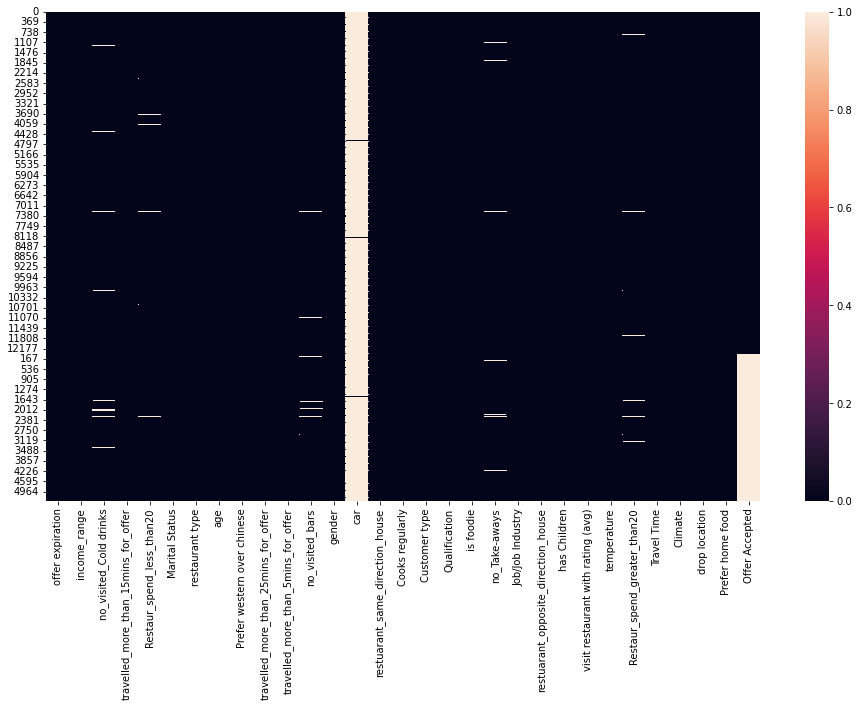

In [26]:
plt.figure(figsize=(16,9))
sns.heatmap(df.isnull())

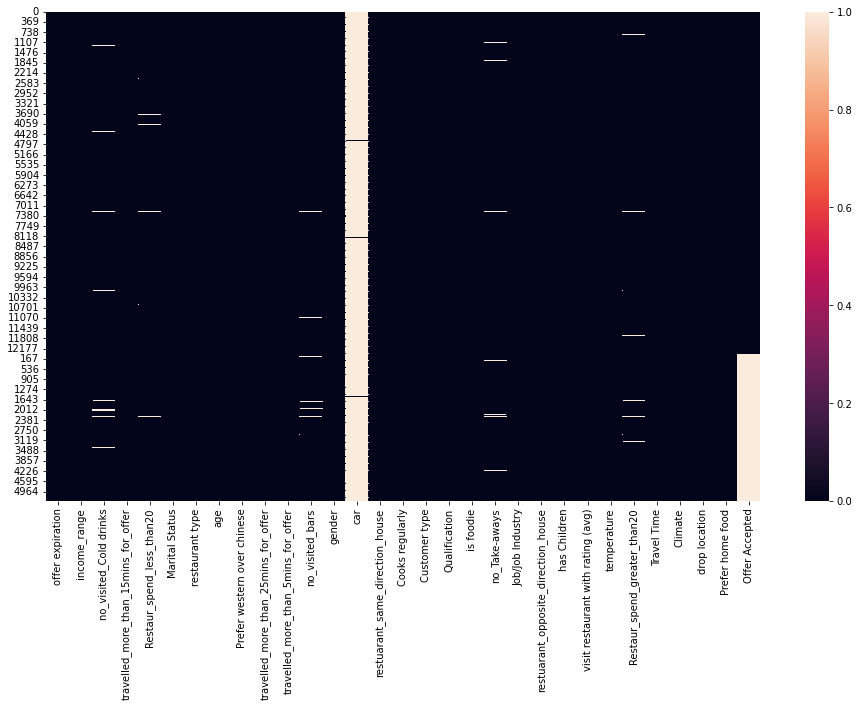

In [27]:
plt.figure(figsize=(16,9))
sns.heatmap(df.isnull())

In [29]:
null_percent = df.isnull().sum()/df.shape[0]*100
null_percent

offer expiration                         0.000000
income_range                             0.000000
no_visited_Cold drinks                   1.628591
travelled_more_than_15mins_for_offer     0.000000
Restaur_spend_less_than20                1.029179
Marital Status                           0.000000
restaurant type                          0.000000
age                                      0.000000
Prefer western over chinese              0.000000
travelled_more_than_25mins_for_offer     0.000000
travelled_more_than_5mins_for_offer      0.000000
no_visited_bars                          0.808641
gender                                   0.000000
car                                     99.129156
restuarant_same_direction_house          0.000000
Cooks regularly                          0.000000
Customer type                            0.000000
Qualification                            0.000000
is foodie                                0.000000
no_Take-aways                            1.153585


In [30]:
col_for_drop = null_percent[null_percent > 20].keys()

In [31]:
df = df.drop(col_for_drop,"columns")
df.shape

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


(17684, 29)

In [32]:
for i in df.columns:
  print(i + "\t" + str(len(df[i].unique())))

offer expiration	2
income_range	9
no_visited_Cold drinks	6
travelled_more_than_15mins_for_offer	2
Restaur_spend_less_than20	6
Marital Status	5
restaurant type	5
age	8
Prefer western over chinese	2
travelled_more_than_25mins_for_offer	2
travelled_more_than_5mins_for_offer	1
no_visited_bars	6
gender	2
restuarant_same_direction_house	2
Cooks regularly	2
Customer type	4
Qualification	6
is foodie	2
no_Take-aways	6
Job/Job Industry	25
restuarant_opposite_direction_house	2
has Children	2
visit restaurant with rating (avg)	5
temperature	3
Restaur_spend_greater_than20	6
Travel Time	5
Climate	3
drop location	3
Prefer home food	2


In [33]:
for i in df.columns:
  print("Unique value of:>>> {} ({})\n".format(i, len(df[i].unique()), df[i].unique()))

Unique value of:>>> offer expiration (2)

Unique value of:>>> income_range (9)

Unique value of:>>> no_visited_Cold drinks (6)

Unique value of:>>> travelled_more_than_15mins_for_offer (2)

Unique value of:>>> Restaur_spend_less_than20 (6)

Unique value of:>>> Marital Status (5)

Unique value of:>>> restaurant type (5)

Unique value of:>>> age (8)

Unique value of:>>> Prefer western over chinese (2)

Unique value of:>>> travelled_more_than_25mins_for_offer (2)

Unique value of:>>> travelled_more_than_5mins_for_offer (1)

Unique value of:>>> no_visited_bars (6)

Unique value of:>>> gender (2)

Unique value of:>>> restuarant_same_direction_house (2)

Unique value of:>>> Cooks regularly (2)

Unique value of:>>> Customer type (4)

Unique value of:>>> Qualification (6)

Unique value of:>>> is foodie (2)

Unique value of:>>> no_Take-aways (6)

Unique value of:>>> Job/Job Industry (25)

Unique value of:>>> restuarant_opposite_direction_house (2)

Unique value of:>>> has Children (2)

Unique v

In [35]:
train["Offer Accepted"].describe()

count     12379
unique        2
top         Yes
freq       6994
Name: Offer Accepted, dtype: object

TypeError: ignored

<Figure size 720x576 with 0 Axes>

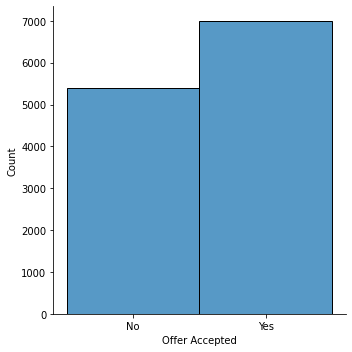

In [44]:
plt.figure(figsize=(10,8))
bar = sns.displot(train["Offer Accepted"])
bar.legend(["Skewness: {:.2f}".format(train['Offer Accepted'].skew())])

TypeError: ignored

<Figure size 720x576 with 0 Axes>

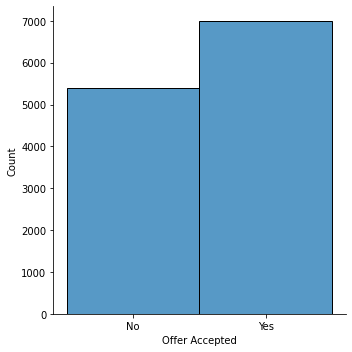

In [50]:
plt.figure(figsize=(10,8))
bar = sns.displot(train["Offer Accepted"])
bar.legend(["Skewness: {:.2f}".format(train["Offer Accepted"].skew())])

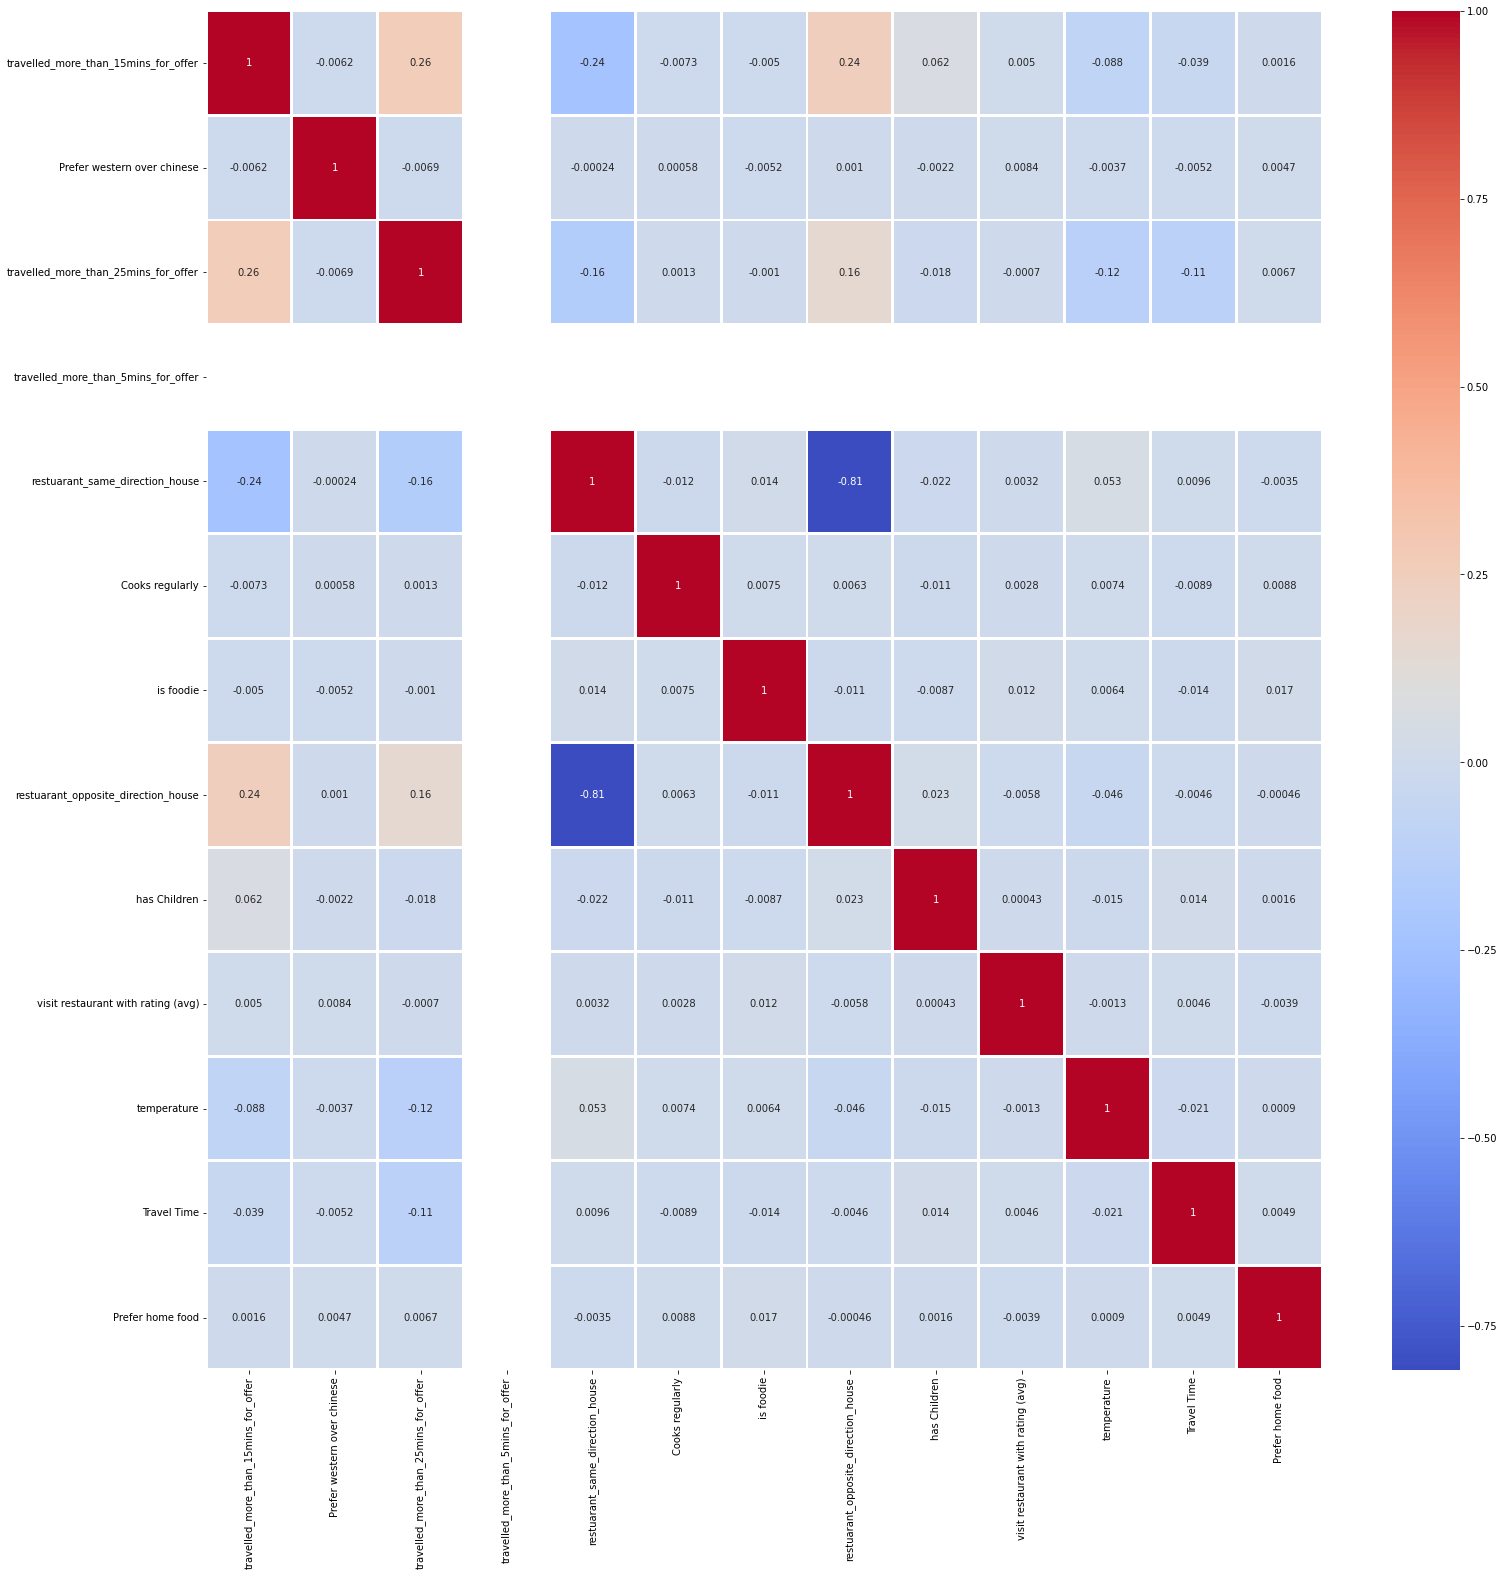

In [51]:
plt.figure(figsize=(25,25))
ax = sns.heatmap(train.corr(), cmap = "coolwarm", annot=True, linewidth=2)

In [52]:
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

(13.5, -0.5)

In [62]:
# Create correlation matrix
corr_matrix = df.corr().abs()
# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
# Find index of feature columns with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.5)]

In [63]:
corr_matrix

travelled_more_than_15mins_for_offer  \
travelled_more_than_15mins_for_offer                              1.000000   
Prefer western over chinese                                       0.002238   
travelled_more_than_25mins_for_offer                              0.260754   
travelled_more_than_5mins_for_offer                                    NaN   
restuarant_same_direction_house                                   0.238590   
Cooks regularly                                                   0.005357   
is foodie                                                         0.002643   
restuarant_opposite_direction_house                               0.246654   
has Children                                                      0.067023   
visit restaurant with rating (avg)                                0.003204   
temperature                                                       0.089106   
Travel Time                                                       0.032266   
Prefer home food                                                  0.001034   

                                      Prefer western over chinese  \
travelled_more_than_15mins_for_offer                     0.002238   
Prefer western over chinese                              1.000000   
travelled_more_than_25mins_for_offer                     0.007609   
travelled_more_than_5mins_for_offer                           NaN   
restuarant_same_direction_house                          0.003653   
Cooks regularly                                          0.009151   
is foodie                                                0.002586   
restuarant_opposite_direction_house                      0.002135   
has Children                                             0.003203   
visit restaurant with rating (avg)                       0.002367   
temperature                                              0.002668   
Travel Time                                              0.009222   
Prefer home food                                         0.003644   

                                      travelled_more_than_25mins_for_offer  \
travelled_more_than_15mins_for_offer                              0.260754   
Prefer western over chinese                                       0.007609   
travelled_more_than_25mins_for_offer                              1.000000   
travelled_more_than_5mins_for_offer                                    NaN   
restuarant_same_direction_house                                   0.157006   
Cooks regularly                                                   0.004872   
is foodie                                                         0.001805   
restuarant_opposite_direction_house                               0.157360   
has Children                                                      0.016672   
visit restaurant with rating (avg)                                0.002516   
temperature                                                       0.117532   
Travel Time                                                       0.100807   
Prefer home food                                                  0.006866   

                                      travelled_more_than_5mins_for_offer  \
travelled_more_than_15mins_for_offer                                  NaN   
Prefer western over chinese                                           NaN   
travelled_more_than_25mins_for_offer                                  NaN   
travelled_more_than_5mins_for_offer                                   NaN   
restuarant_same_direction_house                                       NaN   
Cooks regularly                                                       NaN   
is foodie                                                             NaN   
restuarant_opposite_direction_house                                   NaN   
has Children                                                          NaN   
visit restaurant with rating (avg)                                    NaN   
temperature                           

/usr/local/lib/python3.7/dist-packages/seaborn/matrix.py:198: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
/usr/local/lib/python3.7/dist-packages/seaborn/matrix.py:203: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


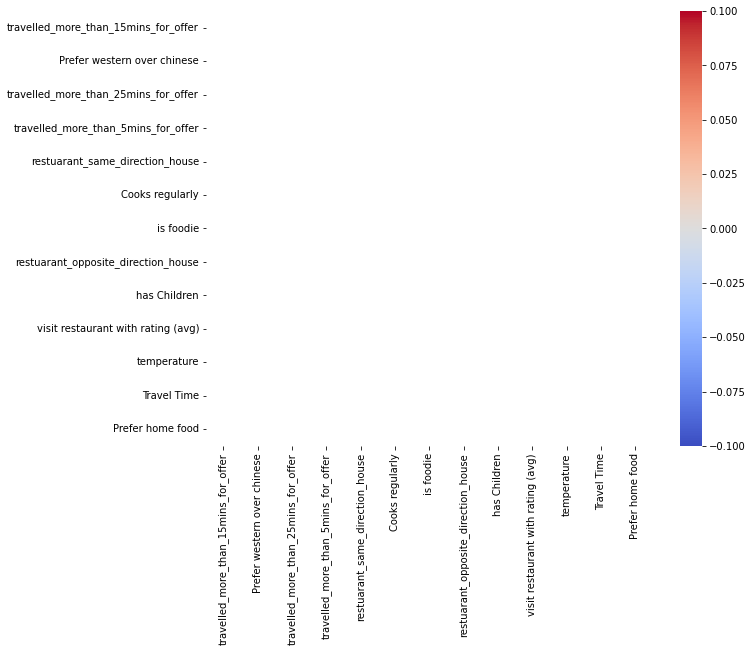

In [64]:
plt.figure(figsize=(10,8))
ax = sns.heatmap(train[corr_matrix].corr(),cmap = "coolwarm", annot=True, linewidth = 3)

In [65]:
bottom, top = ax.get_ylim()

In [70]:
ax.set_ylim(bottom + 0.5, top - 0)

(13.5, 0.0)

KeyError: ignored

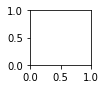

In [72]:
for i in range(len(corr_matrix)):
  if i <= 9:
    plt.subplot(3,4,i+1)
    plt.subplots_adjust(hspace = 0.5, wspace = 0.5)
    sns.regplot(data = train, x = corr_matrix[i],y = "Offer Accepted")

###Handling Missing Values

In [73]:
missing_col = df.columns[df.isnull().any()]
missing_col

Index(['no_visited_Cold drinks', 'Restaur_spend_less_than20',
       'no_visited_bars', 'no_Take-aways', 'Restaur_spend_greater_than20'],
      dtype='object')

In [ ]:
bsmt_col = ['BsmtCond', 'BsmtExposure', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtFinType1',
       'BsmtFinType2', 'BsmtFullBath', 'BsmtHalfBath', 'BsmtQual', 'BsmtUnfSF', 'TotalBsmtSF']
bsmt_feat = df[bsmt_col]
bsmt_feat